# Table of Contents
 <p><div class="lev1 toc-item"><a href="#線形代数" data-toc-modified-id="線形代数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>線形代数</a></div><div class="lev2 toc-item"><a href="#グラムシュミットの直交化" data-toc-modified-id="グラムシュミットの直交化-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>グラムシュミットの直交化</a></div><div class="lev2 toc-item"><a href="#直交補空間" data-toc-modified-id="直交補空間-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>直交補空間</a></div><div class="lev1 toc-item"><a href="#微積分" data-toc-modified-id="微積分-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>微積分</a></div><div class="lev2 toc-item"><a href="#Taylor展開" data-toc-modified-id="Taylor展開-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Taylor展開</a></div><div class="lev2 toc-item"><a href="#積分の比較" data-toc-modified-id="積分の比較-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>積分の比較</a></div><div class="lev3 toc-item"><a href="#積分の誤差" data-toc-modified-id="積分の誤差-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>積分の誤差</a></div><div class="lev1 toc-item"><a href="#1-(2)-図形の面積" data-toc-modified-id="1-(2)-図形の面積-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1-(2) 図形の面積</a></div><div class="lev1 toc-item"><a href="#1-(2)改" data-toc-modified-id="1-(2)改-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1-(2)改</a></div><div class="lev1 toc-item"><a href="#1-(1)-放物線の接線の距離" data-toc-modified-id="1-(1)-放物線の接線の距離-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>1-(1) 放物線の接線の距離</a></div>

# 線形代数

## グラムシュミットの直交化


In [19]:
from sympy import *

init_printing()
x1 = Matrix([1,1,1])
x2 = Matrix([0,1,0])
x3 = Matrix([-1,1,0])

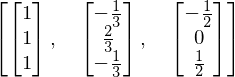

In [135]:
GramSchmidt([x1,x2,x3])

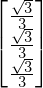

In [141]:
a1 = x1/x1.norm()
a1

In [149]:
y2 = x2-x2.dot(a1)*a1

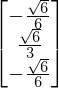

In [150]:
a2 = y2/y2.norm()
a2

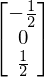

In [154]:
y3 = x3 - x3.dot(a1)*a1-x3.dot(a2)*a2
y3

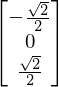

In [155]:
a3 = y3/y3.norm()
a3

## 直交補空間

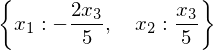

In [32]:
x1,x2,x3,a,b=symbols('x1,x2,x3,a,b')
eq1=2*x1-x2+x3
eq2=x1-3*x2+x3

solve({eq1,eq2},{x1,x2,x3})

In [33]:
eq3 = expand(5/a*(-Rational(2,5)*a*x1+Rational(1,5)*a*x2+a*x3))

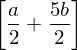

In [34]:
solve(eq3.subs({x2:a,x3:b}),x1)

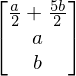

In [35]:
a*Matrix([Rational(1,2),1,0]) + b*Matrix([Rational(5,2),0,1])

# 微積分

## Taylor展開

In [21]:
t = symbols('t')
v = exp(-t)+1.0

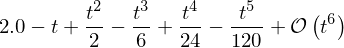

In [44]:
vs = v.series(t,0,6)
vs

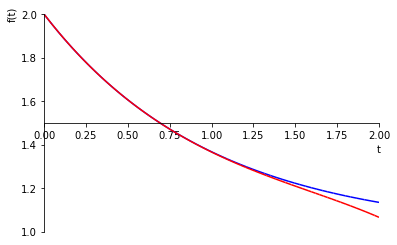

In [53]:
vsO = vs.removeO()
p = plot(v, vsO, (t,0,2), ylim=[1,2], show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

## 積分の比較


In [23]:
i_v = integrate(v,(t,0,2))
pprint(i_v)
i_v.evalf()

       -2      
- 1.0⋅ℯ   + 3.0


In [62]:
i_vs = integrate(vsO,(t,0,2))
pprint(i_vs)
i_vs.evalf()

2.84444444444444


### 積分の誤差

誤差をわかりやすくするには，下のようにまとめれば良い．そうすると必要な次数は7(8)次であることがわかる．

In [25]:
vs = v.series(t,0,50)
pprint(vs)
vsO = vs.removeO()
i_vs = integrate(vsO,(t,0,2))
pprint(i_vs)
i_vs.evalf()-i_v.evalf()


           2    3    4     5     6     7       8       9        10        11  
          t    t    t     t     t     t       t       t        t         t    
2.0 - t + ── - ── + ── - ─── + ─── - ──── + ───── - ────── + ─────── - ───────
          2    6    24   120   720   5040   40320   362880   3628800   3991680

        12          13            14             15              16           
       t           t             t              t               t             
─ + ───────── - ────────── + ─────────── - ───────────── + ────────────── - ──
0   479001600   6227020800   87178291200   1307674368000   20922789888000   35

     17                18                  19                    20           
    t                 t                   t                     t             
───────────── + ──────────────── - ────────────────── + ─────────────────── - 
5687428096000   6402373705728000   121645100408832000   2432902008176640000   

         21                      22              

# 1-(2) 図形の面積

2点Q($x_1,y_1$)とR($x_2,y_2$)を通る直線の方程式は
$$
y-y_1 = \frac{y_1-y_2}{x_1-x_2}(x-x_1)
$$
で求められる．

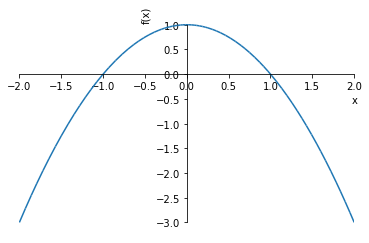

In [72]:
from sympy import *
init_printing()
b, x, t = symbols('b,x,t')
y_c = 1-x**2
plot(y_c,(x,-2,2))

In [73]:
s_c = solve(y_c,x)
s_c

In [74]:
x1=s_c[0]
y1=0
x2=s_c[1]-b
y2=y_c.subs({x:x2})

In [75]:
m = (y1-y2)/(x1-x2)
simplify(m)

In [76]:
y_m = expand(simplify(m)*(x+1))
y_m

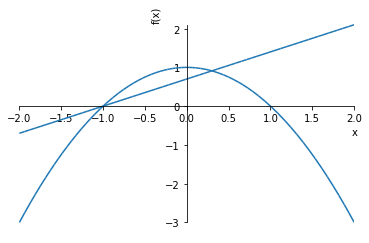

In [77]:
plot(y_c,y_m.subs({b:0.7}),(x,-2,2))

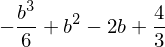

In [78]:
s1=expand(integrate(y_c-y_m,(x,-1,1-b)))
s1

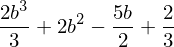

In [79]:
s2=expand(integrate(y_m-y_c,(x,1-b,b)))
s2

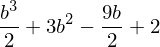

In [80]:
expand(s1+s2)

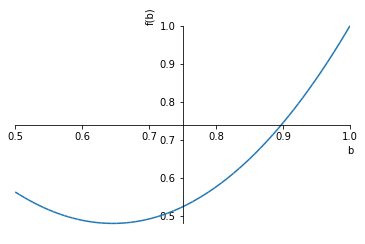

In [81]:
plot(s1+s2,(b,0.5,1))

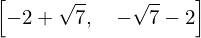

In [82]:
solve(diff(s1+s2,b),b)

# 1-(2)改

放物線$C$の方程式を$y=1-0.5x^2$として問題を解く．
放物線$C$上の2点Q($-\sqrt{2},0$)とR($\sqrt{2}-b,1-(\sqrt{2}-b)^2$)と読み替える．また，$S_2$を求めるときの範囲は$\sqrt{2}-b \leq x \leq b$と読み替える．

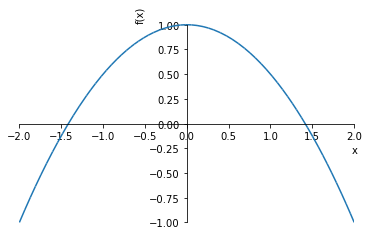

In [2]:
from sympy import *
init_printing()
b, x, t = symbols('b,x,t')
# y_c = 1-0.5*x**2
y_c = 1-Rational(1,2)*x**2
plot(y_c,(x,-2,2))

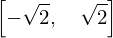

In [3]:
s_c = solve(y_c,x)
s_c

In [4]:
x1=s_c[0]
y1=0
x2=s_c[1]-b
y2=y_c.subs({x:x2})

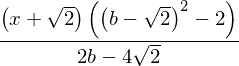

In [10]:
y_m = simplify((y1-y2)/(x1-x2)*(x-x1)+y1)
y_m


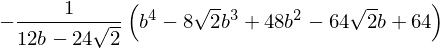

In [11]:
s1= expand(integrate(y_c-y_m,(x,x1,x2)))
simplify(s1)

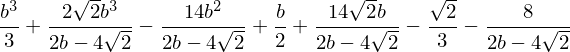

In [12]:
s2=expand(integrate(y_m-y_c,(x,x2,b)))
s2

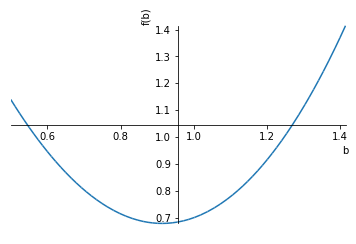

In [13]:
plot(s1+s2,(b,1/2,s_c[1]))

In [14]:
solve(diff(s1+s2,b),b)

In [15]:
solve(diff(s1+s2,b),b)[1].evalf()

IndexError: list index out of range

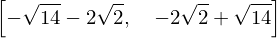

In [16]:
solve(simplify(diff(s1+s2,b)),b)

In [17]:
solve(simplify(diff(s1+s2,b)),b)[1].evalf()

与関数を
$$y=1-\frac{1}{2}x^2$$
つまり
``` python
y=1-Rational(1,2)*x**2
```

とRationalを明示的に使えば．答えは，
$$
\left [ - \sqrt{14} - 2 \sqrt{2}, \quad - 2 \sqrt{2} + \sqrt{14}\right ]
$$
と解析的に求められる．後ろ側が求めた数値解と一致する．
その場合，
``` python
solve(simplify(diff(s1+s2,b)),b)
```
としないと求められない．

# 1-(1) 放物線の接線の距離

2015 年度大学入試センター試験 追試 数学 II・B 第 2 問 (1)の解答例を参考に示しておく(苦労して解いたんで)．

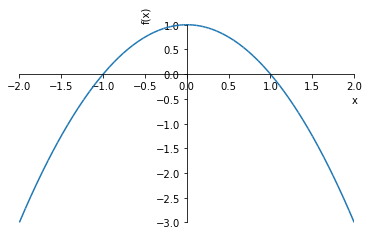

In [47]:
from sympy import *
init_printing()
a, x, t = symbols('a,x,t')
y_c = 1-x**2
plot(y_c,(x,-2,2))

In [48]:
m = diff(y_c,x)
m

In [49]:
y_l=collect(expand(m.subs({x: a})*(x-a)+y_c.subs({x: a})),x)
y_l

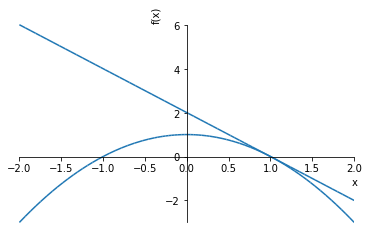

In [50]:
plot(y_l.subs({a:1}),y_c,(x,-2,2))

点($x_0,y_0$)と直線($c_ax+c_by+c_c=0$)の距離($h$)の公式
$$
h = \frac{|c_ax_0+c_by_0+c_c|}{\sqrt{c_a^2+c_b^2}}
$$

In [51]:
c_a=y_l.coeff(x)
c_c=y_l.coeff(x,0)
c_b=-1

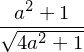

In [52]:
h = (c_a*0+c_b*0+c_c)/sqrt(c_a**2+c_b**2)
h

In [53]:
a_2 = solve(sqrt(4*a**2+1)**2-t**2,a**2)[0]

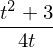

In [54]:
simplify((a_2+1)/t)

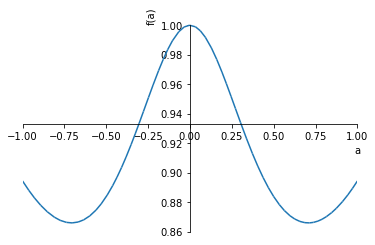

In [55]:
plot(h,(a,-1,1))

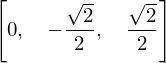

In [56]:
s1 = solve(diff(h,a),a)
s1

In [57]:
h.subs({a:s1[1]})